stream started
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


OSError: [Errno -9981] Input overflowed

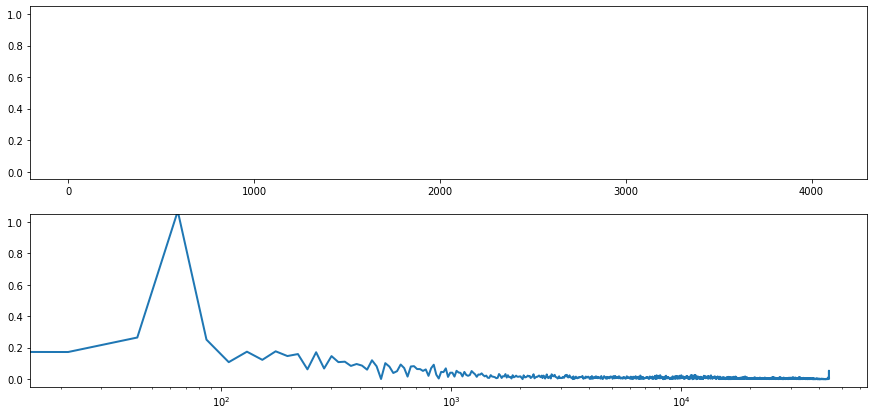

In [22]:
"""
    Notebook for streaming data from a microphone in realtime

    audio is captured using pyaudio
    then converted from binary data to ints using struct
    then displayed using matplotlib

    scipy.fftpack computes the FFT

    if you don't have pyaudio, then run

    >>> pip install pyaudio

    note: with 2048 samples per chunk, I'm getting 20FPS
    when also running the spectrum, its about 15FPS
"""
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import struct
from scipy.fftpack import fft
import sys
import time

check = []

class AudioStream(object):
    def __init__(self):

        # stream constants
        self.CHUNK = 1024 * 2
        self.FORMAT = pyaudio.paInt16
        self.CHANNELS = 1
        self.RATE = 44100
        self.pause = False

        # stream object
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(
            format=self.FORMAT,
            channels=self.CHANNELS,
            rate=self.RATE,
            input=True,
            output=True,
            frames_per_buffer=self.CHUNK,
        )
        
        # plots
        self.fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
        
        # x variables for plotting
        x = np.arange(0, 2 * self.CHUNK, 2)
        xf = np.linspace(0, self.RATE, self.CHUNK)
        
        # create a line object with random data
        self.line, = ax1.plot(x, np.random.rand(self.CHUNK), '-', lw=2)

        # create semilogx line for spectrum
        self.line_fft, = ax2.semilogx(
            xf, np.random.rand(self.CHUNK), '-', lw=2)
        
#         plt.show(block=False)
        
        self.start_plot()

    def start_plot(self):

        print('stream started')
        frame_count = 0
        start_time = time.time()

        while not self.pause:
            data = self.stream.read(self.CHUNK)
            data_int = struct.unpack(str(2 * self.CHUNK) + 'B', data)
            data_np = np.array(data_int, dtype='b')[::2] + 128
            yf = fft(data_int)
            yfft = np.abs(yf[0:self.CHUNK]) / (128 * self.CHUNK)
            
            print(np.argmax(yfft))
            check = yfft
            
            self.line.set_ydata(data_np)
            self.line_fft.set_ydata(yfft)
            
            self.fig.canvas.draw()
            self.fig.canvas.flush_events()

        else:
            self.fr = frame_count / (time.time() - start_time)
            print('average frame rate = {:.0f} FPS'.format(self.fr))
            self.exit_app()

    def exit_app(self):
        print('stream closed')
        self.p.close(self.stream)

    def onClick(self, event):
        self.pause = True


if __name__ == '__main__':
    AudioStream()

In [23]:
check

[]